> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
> **This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.**

>● ‘ScheduledDay’ tells us on what day the patient set up their appointment.

>● ‘Neighborhood’ indicates the location of the hospital.

>● 'Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

>● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis

> what is the overall appointment show-up vs. no show-up rate?

> how many are using Scholarship?

> what are the ratio between Gender?

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [39]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [40]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments.csv')
print(df.shape)

# showing the first 5 lines of the data!
df.head()

(110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [41]:
# checking the info of the data (data types, null values etc..)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [42]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [43]:
# as we can see there is no null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [44]:
# count the number of duplicated 
df.duplicated().sum()

0

In [45]:
# count the number of duplicated patient IDs 
df.PatientId.duplicated().sum()

48228

In [46]:
# count the number of unique patient IDs and appointment IDs
df.loc[:, ['PatientId', 'AppointmentID']].nunique()

PatientId         62299
AppointmentID    110527
dtype: int64

In [47]:
# count the number of duplicated patient IDs and No-show
df.duplicated(['PatientId','No-show']).sum()

38710

In [48]:
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [49]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [50]:
df.Scholarship.value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [51]:
def Gender_visualization():
    round(df.Gender.value_counts()/len(df)*100)
    df["Gender"].value_counts().plot(kind="pie",labels=["Females","Males"], figsize=(10,10),  autopct='%1.0f%%',fontsize = 10, 
                                 explode=(0, .05))
    plt.ylabel("Percentage")
    plt.title("Gender");
    plt.legend();

In [52]:
def Scholarship_uses():
    round(df.Scholarship.value_counts()/len(df)*100)
    df["Scholarship"].value_counts().plot(kind="pie",labels=["No Scholarship","Scholarship"],figsize=(10,10), autopct='%1.0f%%'
                                      ,fontsize = 12, explode=(0, .05))
    plt.ylabel(" Percentage")
    plt.title("Gender");
    plt.legend();



### Data Cleaning

In [53]:
# remove the "-1" from age 
df.drop(df.query("Age == -1").index,inplace=True)

In [54]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [55]:
# rename some columes 
df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)

In [56]:
# Convert ScheduledDay to datetime type
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.ScheduledDay.head()

0   2016-04-29 18:38:08+00:00
1   2016-04-29 16:08:27+00:00
2   2016-04-29 16:19:04+00:00
3   2016-04-29 17:29:31+00:00
4   2016-04-29 16:07:23+00:00
Name: ScheduledDay, dtype: datetime64[ns, UTC]

In [57]:
# Convert ScheduledDay to datetime type
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)
df.AppointmentDay.head(2)

0   2016-04-29 00:00:00+00:00
1   2016-04-29 00:00:00+00:00
Name: AppointmentDay, dtype: datetime64[ns, UTC]

In [58]:
# Reomve the duplicated in patient IDs and No-show
df.drop_duplicates(['PatientId','No_show'],inplace = True)
df.shape

(71816, 14)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations**


In [59]:
# checking the info of the data (data types, null values etc..)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71816 entries, 0 to 110524
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   PatientId       71816 non-null  float64            
 1   AppointmentID   71816 non-null  int64              
 2   Gender          71816 non-null  object             
 3   ScheduledDay    71816 non-null  datetime64[ns, UTC]
 4   AppointmentDay  71816 non-null  datetime64[ns, UTC]
 5   Age             71816 non-null  int64              
 6   Neighbourhood   71816 non-null  object             
 7   Scholarship     71816 non-null  int64              
 8   Hypertension    71816 non-null  int64              
 9   Diabetes        71816 non-null  int64              
 10  Alcoholism      71816 non-null  int64              
 11  Handicap        71816 non-null  int64              
 12  SMS_received    71816 non-null  int64              
 13  No_show         71816 non-null

In [60]:
# showing the first 5 lines of the data!
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


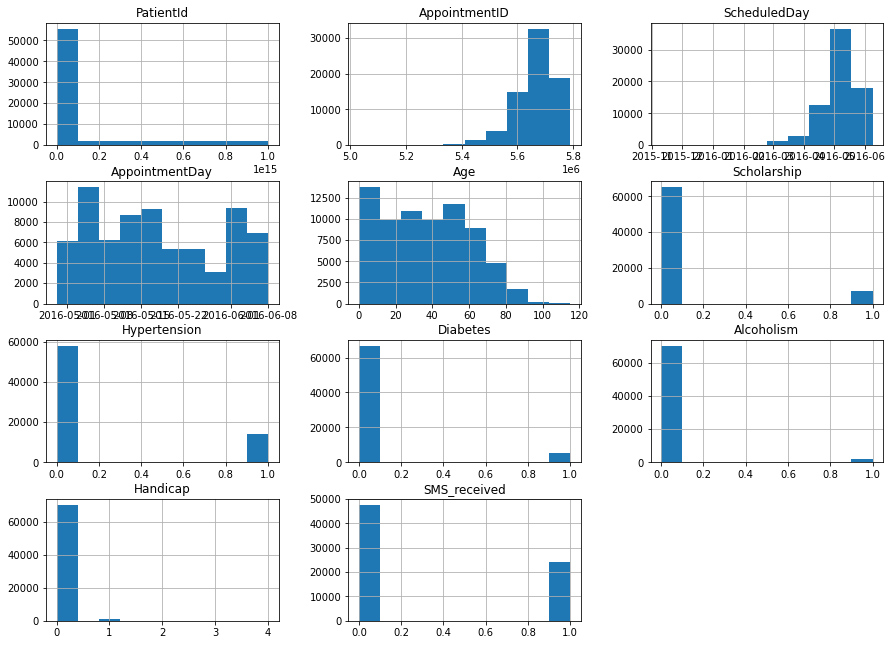

In [61]:
#visualizations if all data
df.hist(figsize=(15,11));

### Research Question 1 (what are the ratio between Gender?)

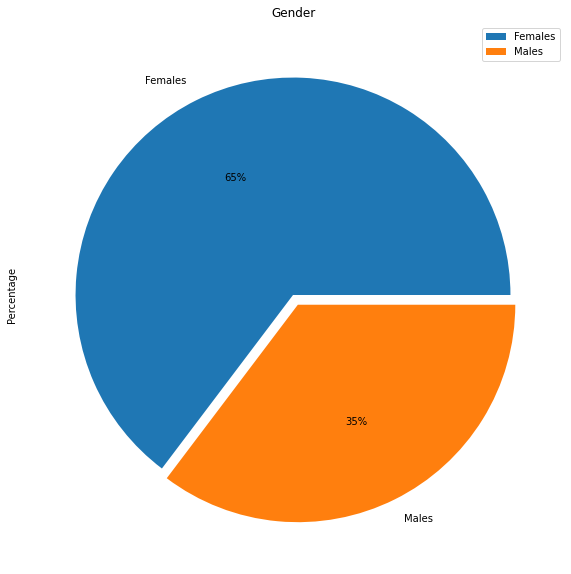

In [62]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
Gender_visualization()

### Research Question 2  (how many are using Scholarship?)

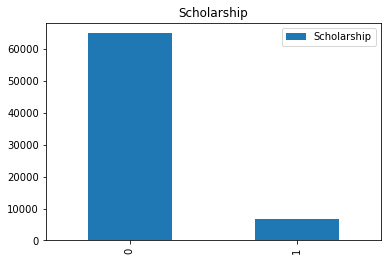

In [63]:
df.Scholarship.value_counts()/len(df)*100
df.Scholarship.value_counts().plot(kind="bar")
plt.title("Scholarship");
plt.legend();

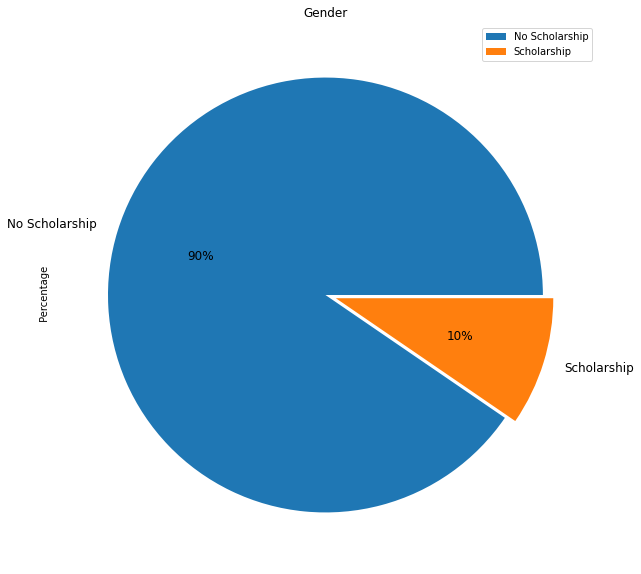

In [64]:
Scholarship_uses()

### Research Question 3  (what is the overall appointment show-up vs. no show-up rate?)


In [65]:
# create a mask for people who came
showed = df.No_show =='No'
no_showed = df.No_show == 'Yes'

In [66]:
round(df[showed].count())

PatientId         54153
AppointmentID     54153
Gender            54153
ScheduledDay      54153
AppointmentDay    54153
Age               54153
Neighbourhood     54153
Scholarship       54153
Hypertension      54153
Diabetes          54153
Alcoholism        54153
Handicap          54153
SMS_received      54153
No_show           54153
dtype: int64

In [67]:
df[no_showed].count()

PatientId         17663
AppointmentID     17663
Gender            17663
ScheduledDay      17663
AppointmentDay    17663
Age               17663
Neighbourhood     17663
Scholarship       17663
Hypertension      17663
Diabetes          17663
Alcoholism        17663
Handicap          17663
SMS_received      17663
No_show           17663
dtype: int64

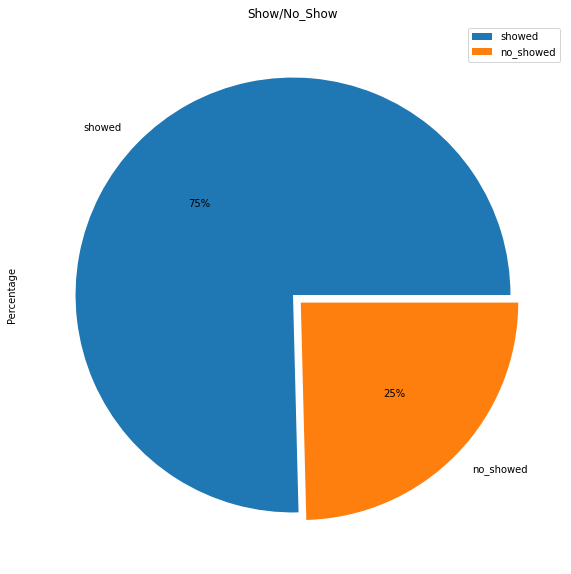

In [68]:
df["No_show"].value_counts().plot(kind="pie",labels=["showed","no_showed"], figsize=(10,10),  autopct='%1.0f%%',fontsize = 10, 
                                 explode=(0, .05))
plt.ylabel("Percentage")
plt.title("Show/No_Show");
plt.legend();

### Research Question 4  (what is the mean ratio of appointment show-up vs. no show-up to the age ?)


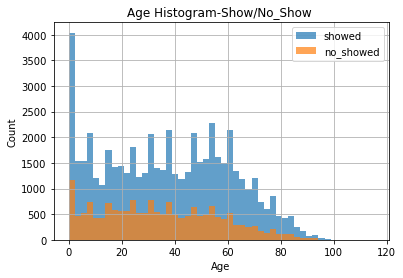

In [69]:
df[showed].Age.hist(alpha=0.7, bins=50,label="showed")
df[no_showed].Age.hist(alpha=0.7, bins=50,label="no_showed")
plt.legend();
plt.title("Age Histogram-Show/No_Show ")
plt.xlabel("Age")
plt.ylabel("Count");

In [70]:
df.Age[showed].mean()

37.22916551252931

In [71]:
df.Age[no_showed].mean()


34.37626677234898

<a id='conclusions'></a>
## Conclusions

> As we can see in our investigation the Age is the most important factor that decided if a patient would come or not the average of age for people who will be most likely to show up is 37.22916551252931 , and the average age for people who are not likely to show up is 34.37626677234898.

>As we can see in our investigation the the no show vs show that about 75% of patients show up at the appointment and 25 only not show.

>As we can see in our investigation the  patienst that use Scholarship only 10% of the over all the patients data.

>As we can see in our investigation the most of the  patients are females with 65% while the male ar 35%  


### Limitations
> There was no explanation of how the data was collected, and if it was collected in a way that makes these analyses more reliable.

>The period when the data collected was just nearly two months, and this short period doesn't make the data reliable to make a strong correlation

>The dataset didn't explain why the patient comes to the doctor, which may give an additional explanation about why they miss their appointments.


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [72]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1